In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


In [3]:
df=pd.read_csv('train.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.info() #to find out datatypes of of the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe().T #to get the statistical description of attributes that aren't objects

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
df.describe(include=['O']).T #to get the statistical description of attributes that are objects

,count,unique,top,freq
Loan_ID,614,614,LP001350,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [8]:
df.isnull().sum() #finding number of rows with NaN data

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
nanVals = df.isnull()  #finding all rows with NaN values
rowsWithNan = nanVals.any(axis=1)
rowsWithNan = df[rowsWithNan]
print(rowsWithNan) 

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
16   LP001034    Male      No          1  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate           NaN   
23   LP001050     NaN     Yes          2  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
592  LP002933     NaN      No         3+      Graduate           Yes   
597  LP002943    Male      No        NaN      Graduate            No   
600  LP002949  Female      No         3+      Graduate           NaN   
601  LP002950    Male     Yes          0  Not Graduate           NaN   
605  LP002960    Male     Yes          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

## Data Pre-Processing

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df['Gender'].unique() #binary data

array(['Male', 'Female', nan], dtype=object)

In [12]:
df['Married'].unique() #binary data

array(['No', 'Yes', nan], dtype=object)

In [13]:
df['Dependents'].unique() #ordinal data

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
df['Self_Employed'].unique() #binary data

array(['No', 'Yes', nan], dtype=object)

In [15]:
df['LoanAmount'].unique() #numerical data

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [16]:
df['Loan_Amount_Term'].unique() #numeric data

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [17]:
df['Credit_History'].unique() #binary data

array([ 1.,  0., nan])

In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df["Married"].fillna(df['Married'].mode()[0],inplace=True)

In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
df["Dependents"].fillna(df['Dependents'].mode()[0],inplace=True)

In [22]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df["Self_Employed"].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [24]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df["Loan_Amount_Term"].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [26]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df["Credit_History"].fillna(df['Credit_History'].mode()[0],inplace=True)

In [28]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df["Gender"].fillna(df['Gender'].mode()[0],inplace=True)

In [30]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
df["LoanAmount"].fillna(df['LoanAmount'].mean(),inplace=True) #since LoanAmount is numeric, we fill that data with mean

In [32]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df.duplicated().sum()

0

## Data Transformation

In [34]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']  #Attribute Construction

In [35]:
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [36]:
df['Gender'].replace('Male',int(0),inplace=True) # changing binary string data to binary int data
df['Gender'].replace('Female',int(1),inplace=True)
df['Married'].replace('No',0,inplace=True)
df['Married'].replace('Yes',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)
df['Credit_History'].replace(1.0,1,inplace=True)
df['Credit_History'].replace(0.0,0,inplace=True)
df['Self_Employed'].replace('Yes',1,inplace=True)
df['Self_Employed'].replace('No',0,inplace=True)
df['Education'].replace('Graduate',1,inplace=True)
df['Education'].replace('Not Graduate',0,inplace=True)

In [37]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,0,0,0,1,0,146.412162,360.0,1.0,Urban,1,5849.0
1,LP001003,0,1,1,1,0,128.000000,360.0,1.0,Rural,0,6091.0
2,LP001005,0,1,0,1,1,66.000000,360.0,1.0,Urban,1,3000.0
3,LP001006,0,1,0,0,0,120.000000,360.0,1.0,Urban,1,4941.0
4,LP001008,0,0,0,1,0,141.000000,360.0,1.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,71.000000,360.0,1.0,Rural,1,2900.0
610,LP002979,0,1,3+,1,0,40.000000,180.0,1.0,Rural,1,4106.0
611,LP002983,0,1,1,1,0,253.000000,360.0,1.0,Urban,1,8312.0
612,LP002984,0,1,2,1,0,187.000000,360.0,1.0,Urban,1,7583.0


In [38]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [39]:
from sklearn import preprocessing
label_encoder_dependents = preprocessing.LabelEncoder()
df['Dependents']= label_encoder_dependents.fit_transform(df['Dependents'])
df['Dependents'].unique()

array([0, 1, 2, 3])

In [40]:
label_encoder_pa = preprocessing.LabelEncoder()
df['Property_Area']= label_encoder_pa.fit_transform(df['Property_Area'])
df['Property_Area'].unique()

array([2, 0, 1])

In [41]:
label_encoder_pa = preprocessing.LabelEncoder()
df['Loan_ID']= label_encoder_pa.fit_transform(df['Loan_ID'])
df['Loan_ID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [42]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,0,0,0,1,0,146.412162,360.0,1.0,2,1,5849.0
1,1,0,1,1,1,0,128.000000,360.0,1.0,0,0,6091.0
2,2,0,1,0,1,1,66.000000,360.0,1.0,2,1,3000.0
3,3,0,1,0,0,0,120.000000,360.0,1.0,2,1,4941.0
4,4,0,0,0,1,0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,1,0,0,1,0,71.000000,360.0,1.0,0,1,2900.0
610,610,0,1,3,1,0,40.000000,180.0,1.0,0,1,4106.0
611,611,0,1,1,1,0,253.000000,360.0,1.0,2,1,8312.0
612,612,0,1,2,1,0,187.000000,360.0,1.0,2,1,7583.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    int32  
 1   Gender            614 non-null    int64  
 2   Married           614 non-null    int64  
 3   Dependents        614 non-null    int32  
 4   Education         614 non-null    int64  
 5   Self_Employed     614 non-null    int64  
 6   LoanAmount        614 non-null    float64
 7   Loan_Amount_Term  614 non-null    float64
 8   Credit_History    614 non-null    float64
 9   Property_Area     614 non-null    int32  
 10  Loan_Status       614 non-null    int64  
 11  TotalIncome       614 non-null    float64
dtypes: float64(4), int32(3), int64(5)
memory usage: 50.5 KB


In [44]:
# plt.hist(df,bins=100)
# plt.show()

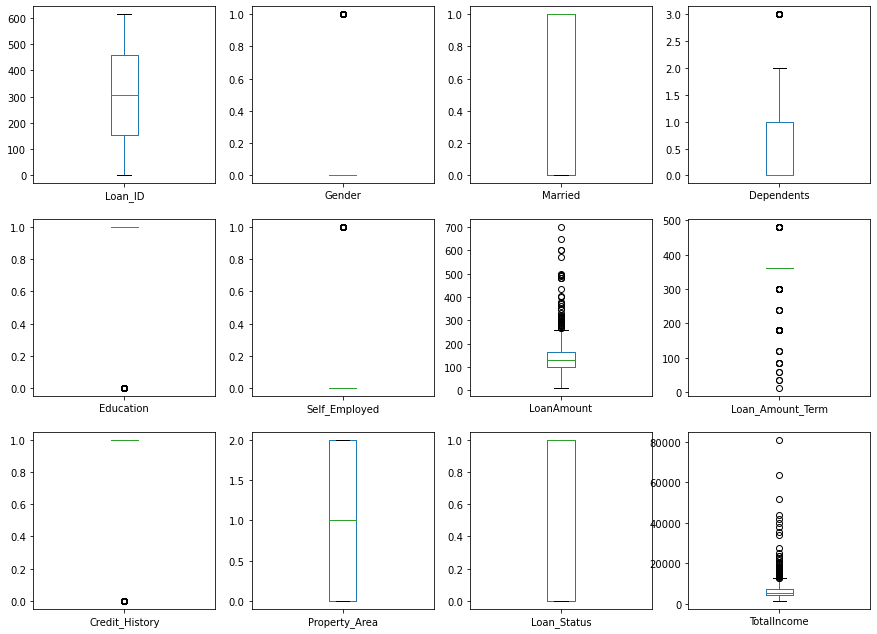

In [45]:
df.plot(kind = "box",layout = (4,4),subplots = True,figsize = (15,15))
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

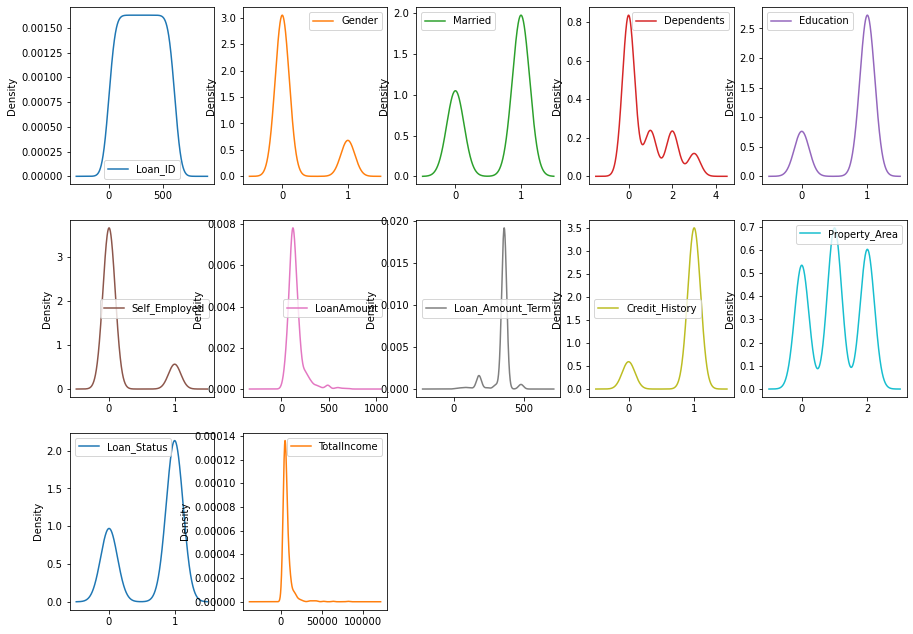

In [46]:
df.plot(kind="density", layout=(4,5),subplots=True, figsize=(15,15), sharex=False)

In [47]:
df.corr()['Loan_Status']

Loan_ID             0.011773
Gender             -0.017987
Married             0.091478
Dependents          0.010118
Education           0.085884
Self_Employed      -0.003700
LoanAmount         -0.036416
Loan_Amount_Term   -0.022549
Credit_History      0.540556
Property_Area       0.032112
Loan_Status         1.000000
TotalIncome        -0.031271
Name: Loan_Status, dtype: float64

In [48]:
# plt.scatter(df['Credit_History'], df['Loan_Status'])
# plt.show()

In [49]:
# plt.hist(df['LoanAmount'], bins = 40, color='orange' )

In [50]:
# plt.hist(df['TotalIncome'], bins = 1000, color='orange' )

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

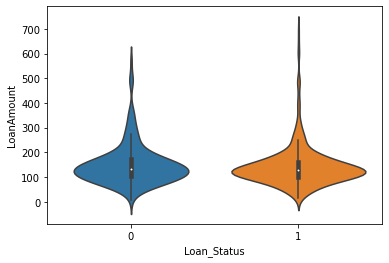

In [51]:
sns.violinplot(x="Loan_Status",y="LoanAmount" ,data=df)

In [52]:
# plt.hist(df['LoanAmount'], bins = 40, color='orange' )

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

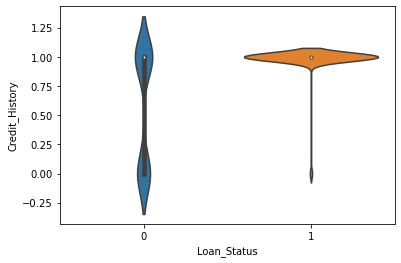

In [53]:
sns.violinplot(x="Loan_Status",y="Credit_History" ,data=df)

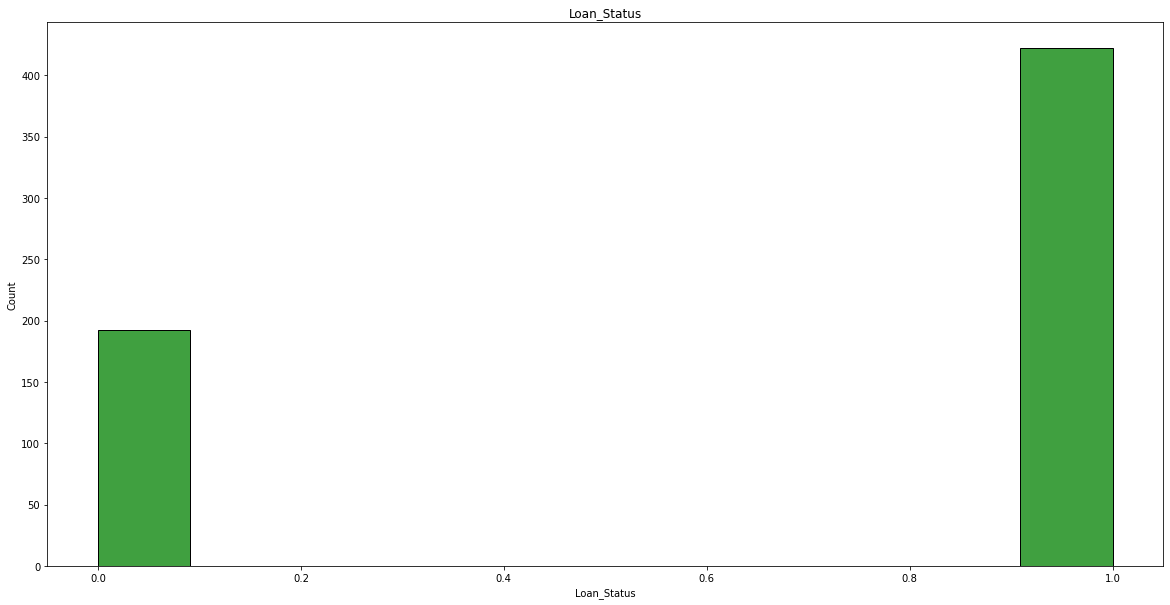

In [54]:
plt.figure(figsize=(20,10))
plt.title('Loan_Status')
sns.histplot(data=df, x='Loan_Status',color='green');

In [55]:
# sns.boxplot(x="Property_Area", data=df)

No handles with labels found to put in legend.


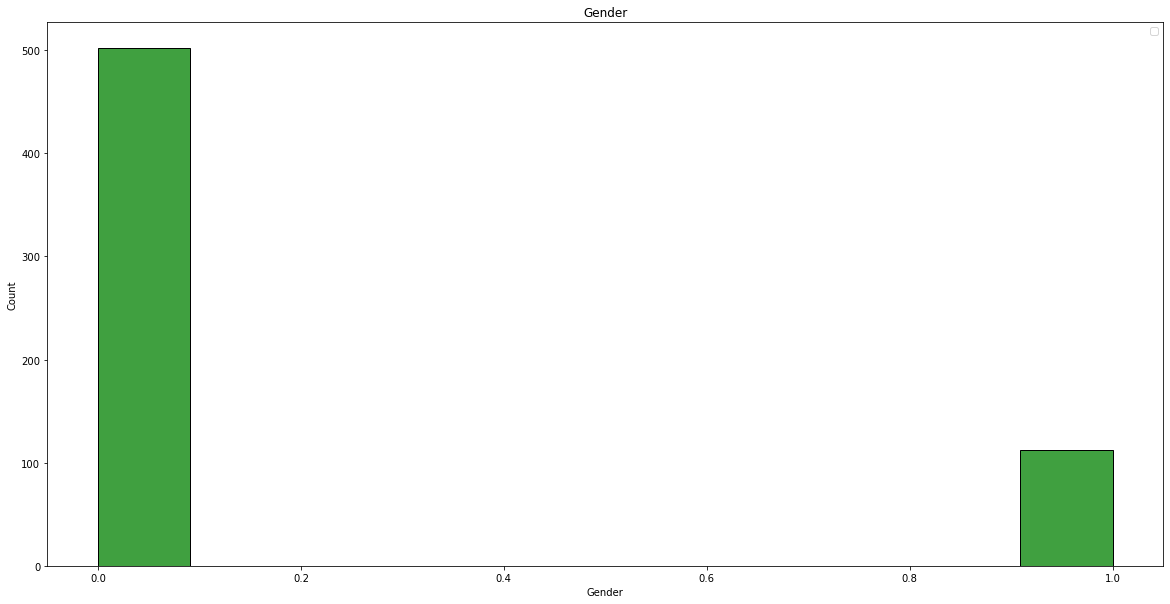

In [56]:
plt.figure(figsize=(20,10))
plt.title('Gender')
sns.histplot(data=df, x='Gender',color='green');
plt.legend()

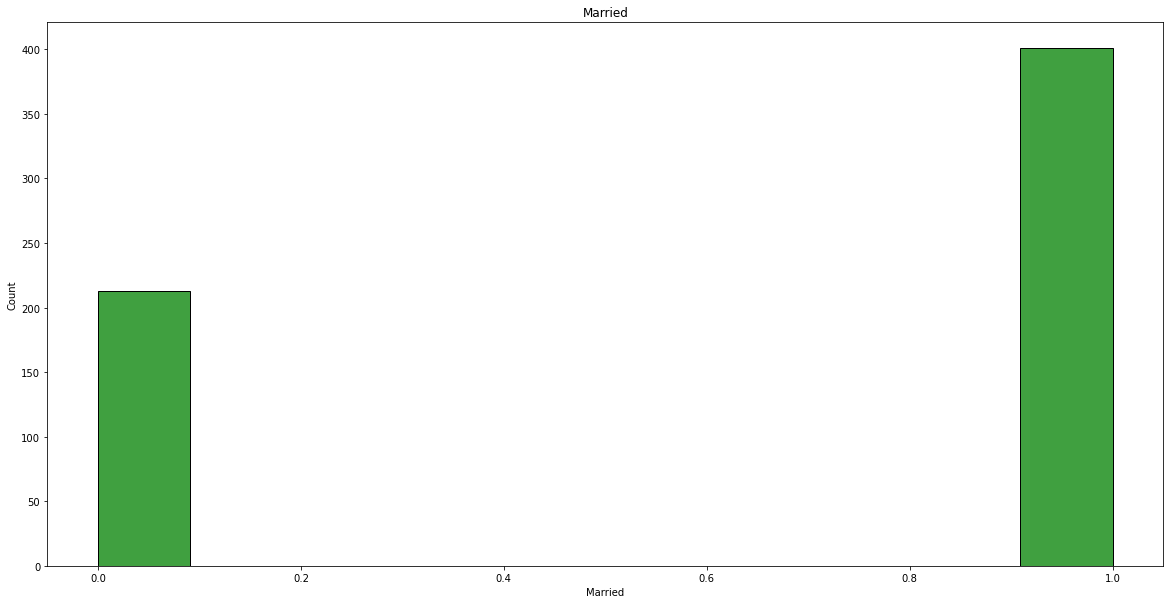

In [57]:
plt.figure(figsize=(20,10))
plt.title('Married')
sns.histplot(data=df, x='Married',color='green');

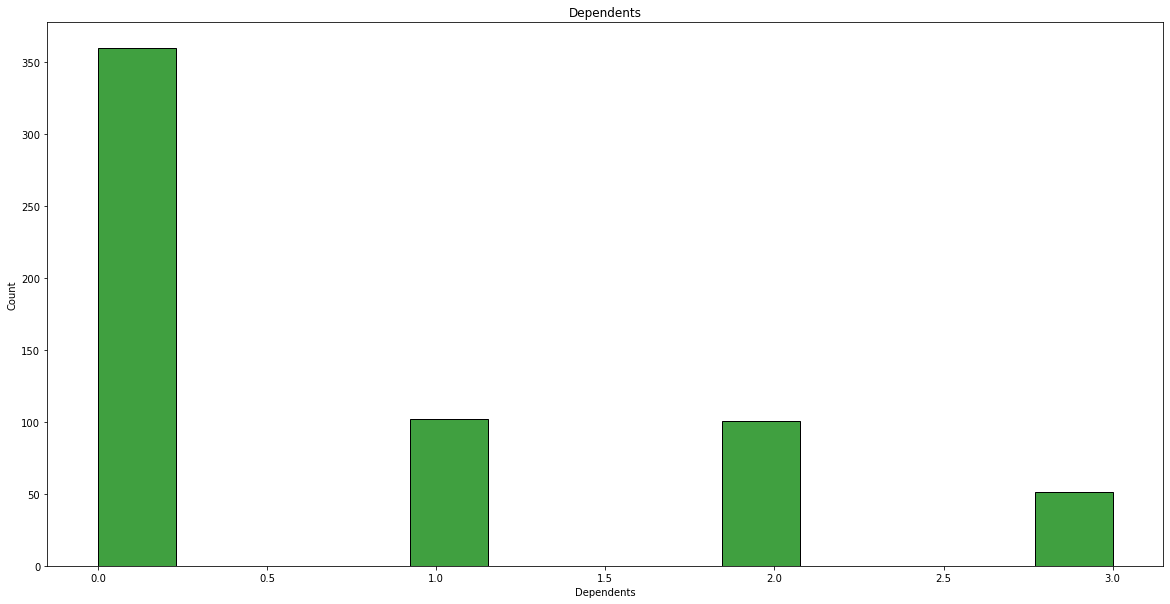

In [58]:
plt.figure(figsize=(20,10))
plt.title('Dependents')
sns.histplot(data=df, x='Dependents',color='green');

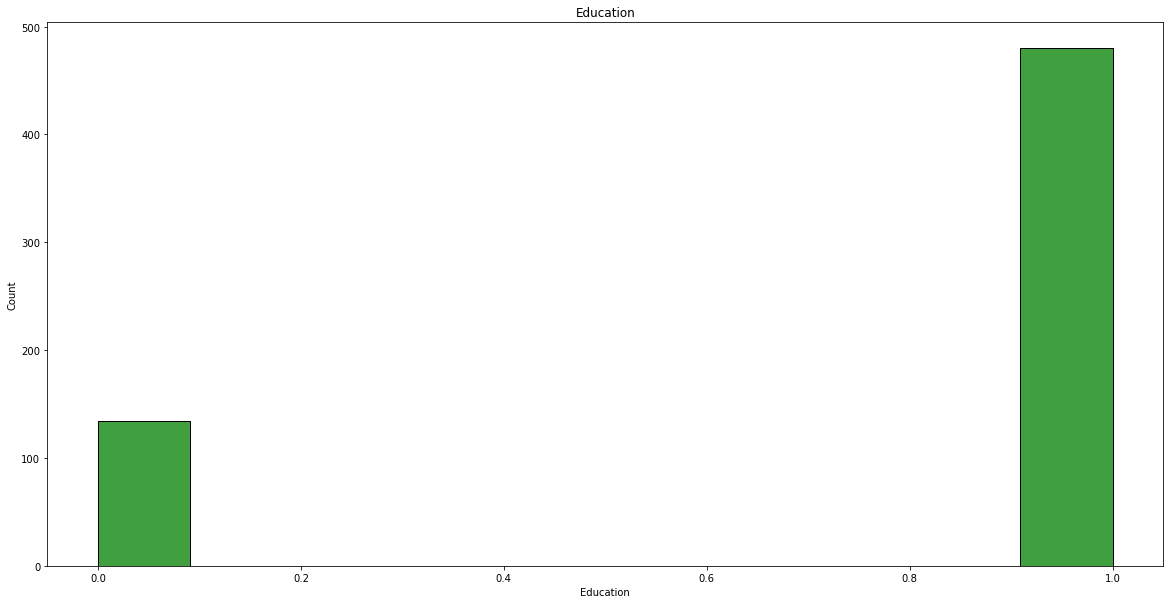

In [59]:
plt.figure(figsize=(20,10))
plt.title('Education')
sns.histplot(data=df, x='Education',color='green');

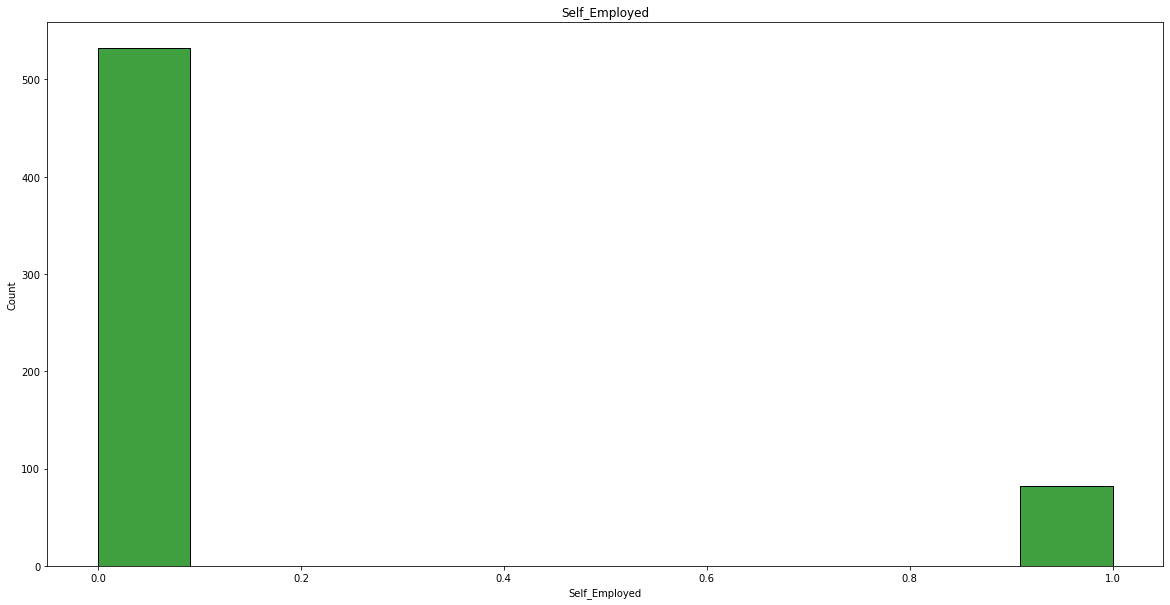

In [60]:
plt.figure(figsize=(20,10))
plt.title('Self_Employed')
sns.histplot(data=df, x='Self_Employed',color='green');


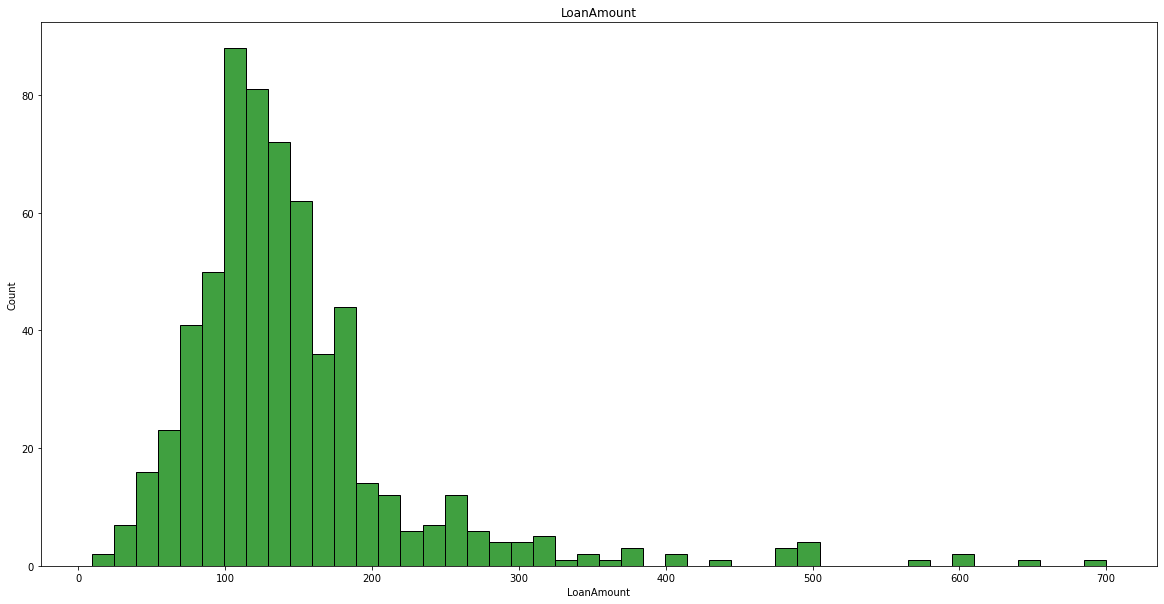

In [61]:
plt.figure(figsize=(20,10))
plt.title('LoanAmount')
sns.histplot(data=df, x='LoanAmount',color='green');


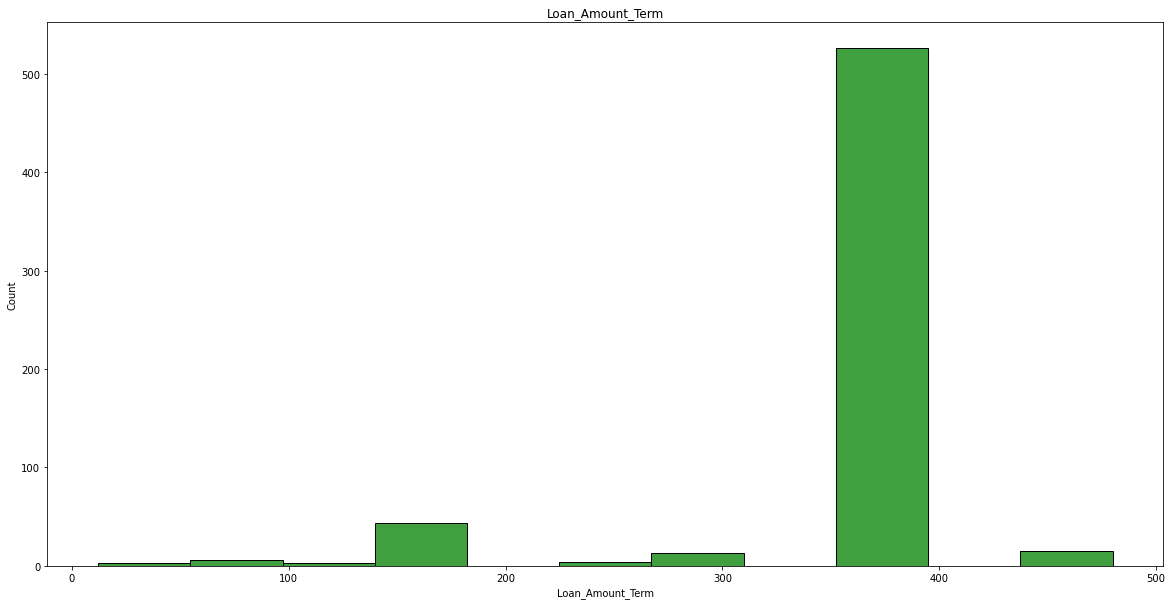

In [62]:
plt.figure(figsize=(20,10))
plt.title('Loan_Amount_Term')
sns.histplot(data=df, x='Loan_Amount_Term',color='green');


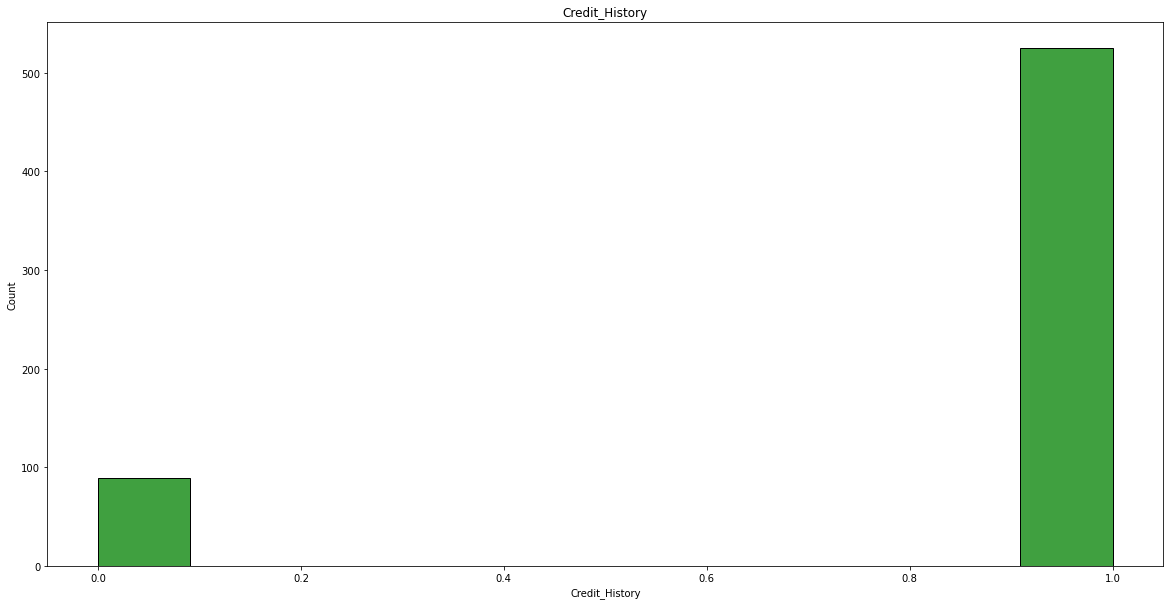

In [63]:
plt.figure(figsize=(20,10))
plt.title('Credit_History')
sns.histplot(data=df, x='Credit_History',color='green');


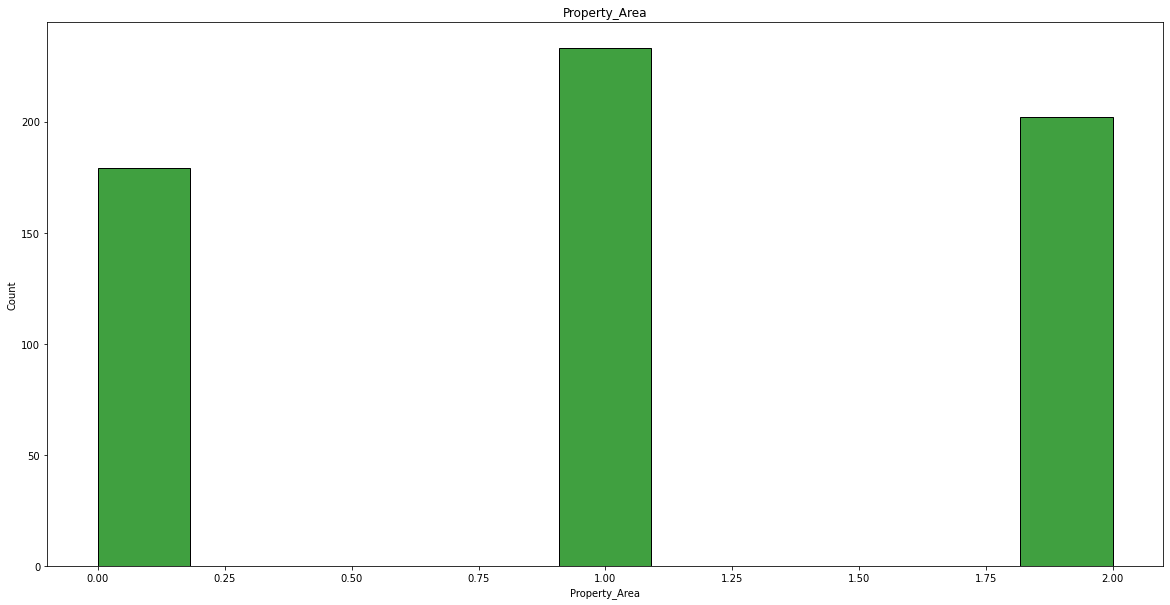

In [64]:
plt.figure(figsize=(20,10))
plt.title('Property_Area')
sns.histplot(data=df, x='Property_Area',color='green');


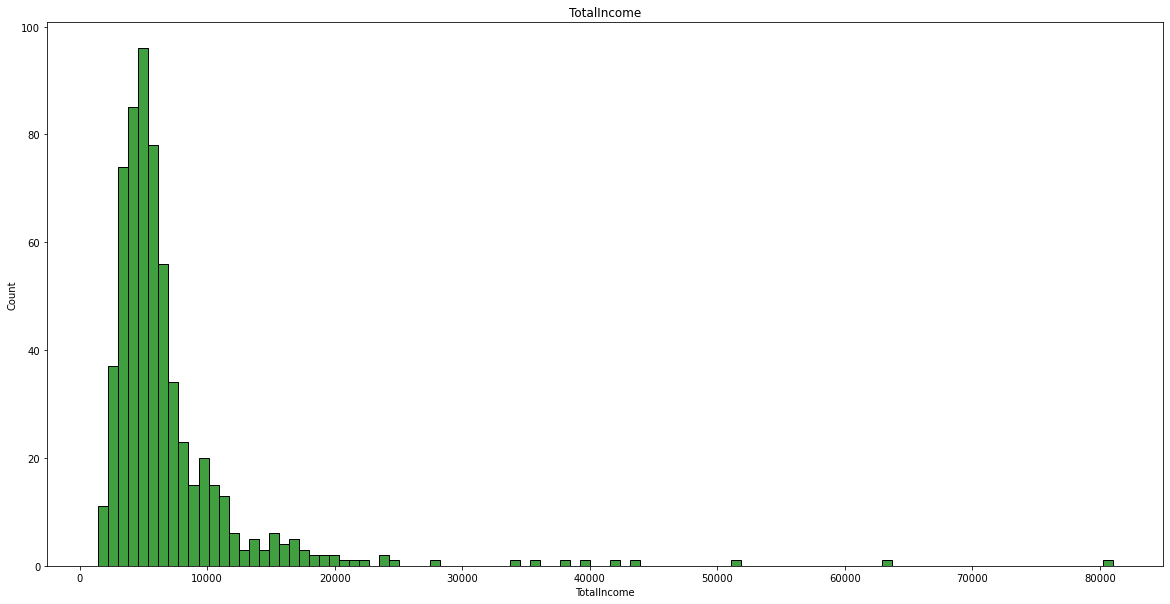

In [65]:
plt.figure(figsize=(20,10))
plt.title('TotalIncome')
sns.histplot(data=df, x='TotalIncome',color='green');


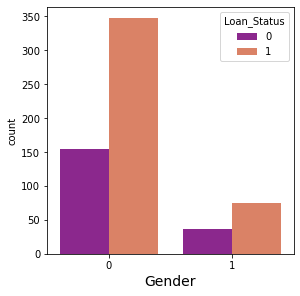

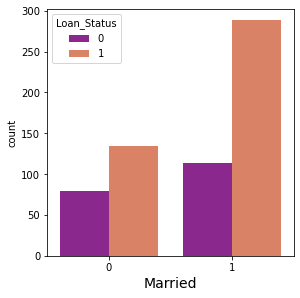

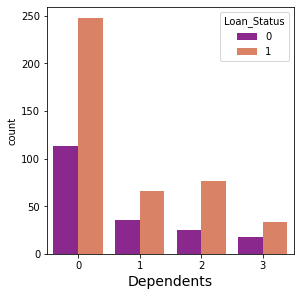

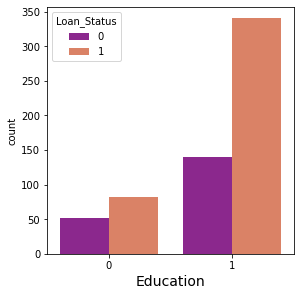

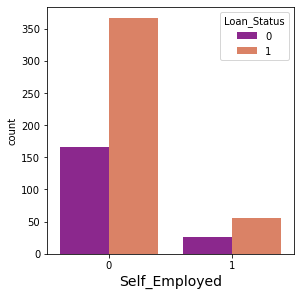

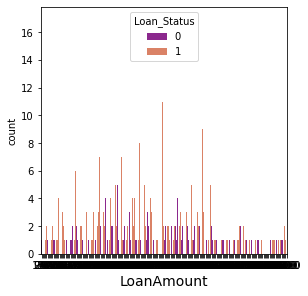

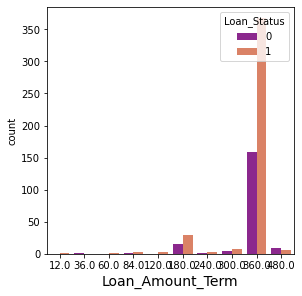

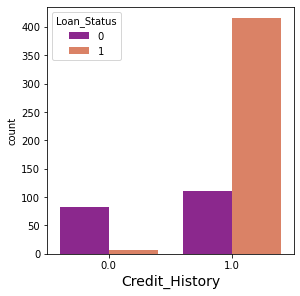

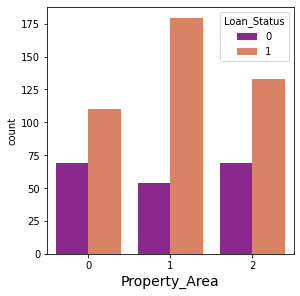

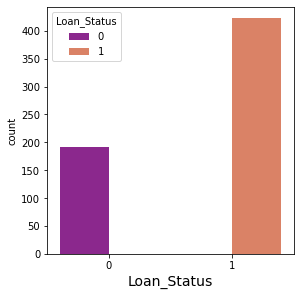

In [66]:
for i in df.columns.to_list()[1:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

## Removing outliers

In [68]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[1.72923217 0.47234264 1.37208932 ... 1.22329839 0.67451931 0.18218376]
 [1.7235903  0.47234264 0.72881553 ... 1.31851281 1.48253724 0.14468416]
 [1.71794844 0.47234264 0.72881553 ... 1.22329839 0.67451931 0.62365632]
 ...
 [1.71794844 0.47234264 0.72881553 ... 1.22329839 0.67451931 0.19947539]
 [1.7235903  0.47234264 0.72881553 ... 1.22329839 0.67451931 0.08651172]
 [1.72923217 2.11710719 1.37208932 ... 0.04760721 1.48253724 0.37835935]]


In [69]:
threshold = 3    
print(np.where(z > 3))
print('Number of Outliers: ',len(np.where(z > 3)[0])+len(np.where(z > 3)[1])) #finding the number of outliers

(array([ 14,  68,  94, 130, 133, 155, 155, 171, 171, 177, 183, 185, 242,
       262, 278, 308, 313, 333, 333, 369, 409, 432, 443, 487, 495, 497,
       506, 506, 523, 525, 546, 561, 575, 581, 585, 600, 604], dtype=int64), array([ 7,  7,  7,  6,  7,  6, 11,  6, 11,  6, 11, 11,  7,  7,  6,  6,  7,
        6, 11,  6, 11,  6, 11,  6,  7,  7,  6, 11,  6,  6,  7,  6,  7, 11,
        7, 11,  6], dtype=int64))
Number of Outliers:  74


In [70]:
df = df[(z < 3).all(axis=1)]

In [71]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,0,0,0,1,0,146.412162,360.0,1.0,2,1,5849.0
1,1,0,1,1,1,0,128.000000,360.0,1.0,0,0,6091.0
2,2,0,1,0,1,1,66.000000,360.0,1.0,2,1,3000.0
3,3,0,1,0,0,0,120.000000,360.0,1.0,2,1,4941.0
4,4,0,0,0,1,0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,1,0,0,1,0,71.000000,360.0,1.0,0,1,2900.0
610,610,0,1,3,1,0,40.000000,180.0,1.0,0,1,4106.0
611,611,0,1,1,1,0,253.000000,360.0,1.0,2,1,8312.0
612,612,0,1,2,1,0,187.000000,360.0,1.0,2,1,7583.0


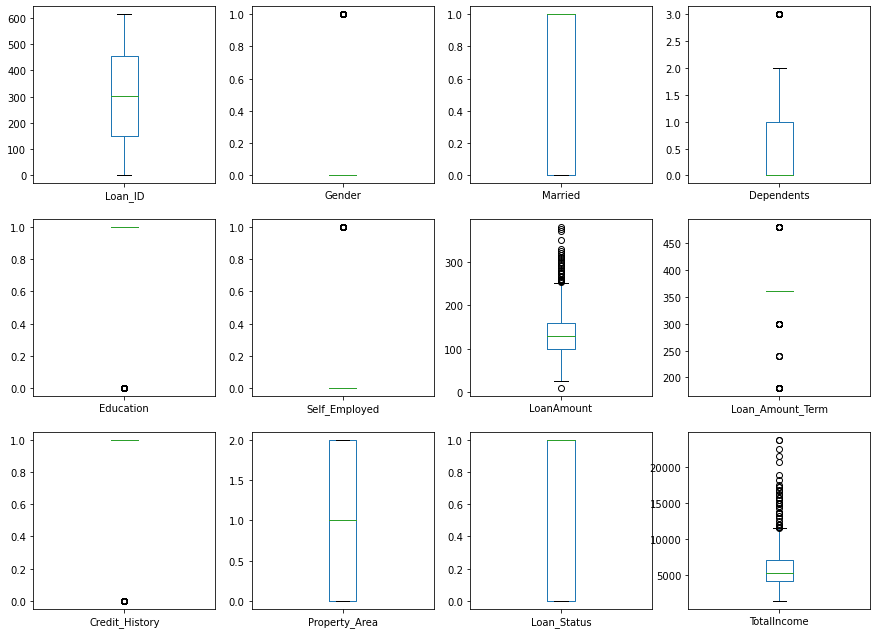

In [72]:
df.plot(kind = "box",layout = (4,4),subplots = True,figsize = (15,15))
plt.show()

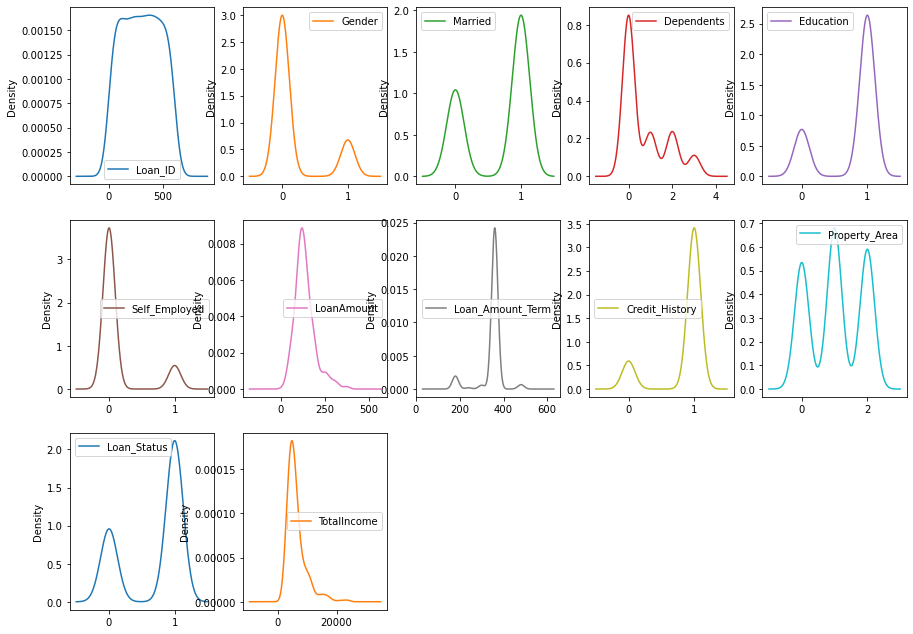

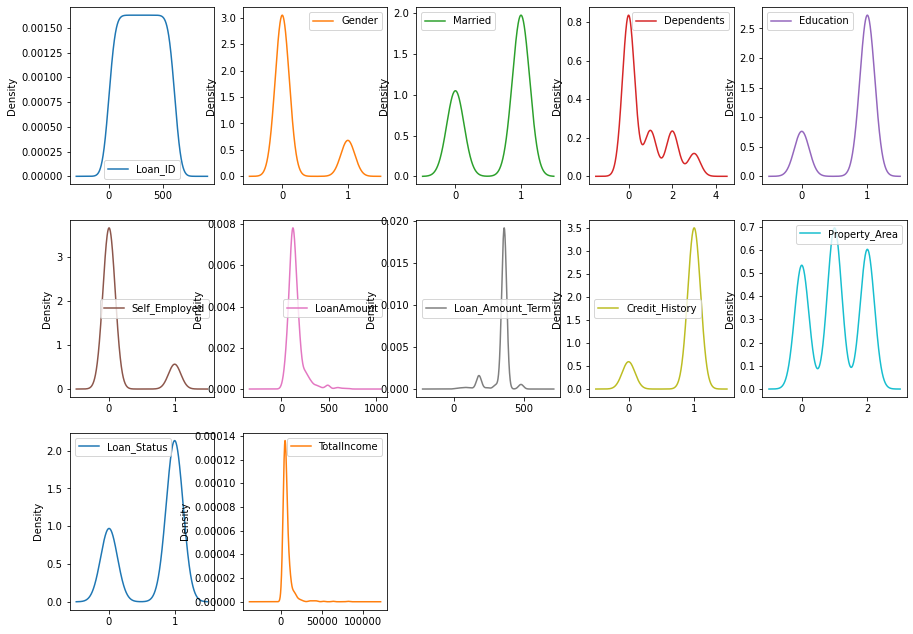

In [73]:
df.plot(kind = "density",layout = (4,5),subplots = True,figsize = (15,15),sharex = False)
plt.show()

# Data Reduction

## Correlation HeatMap

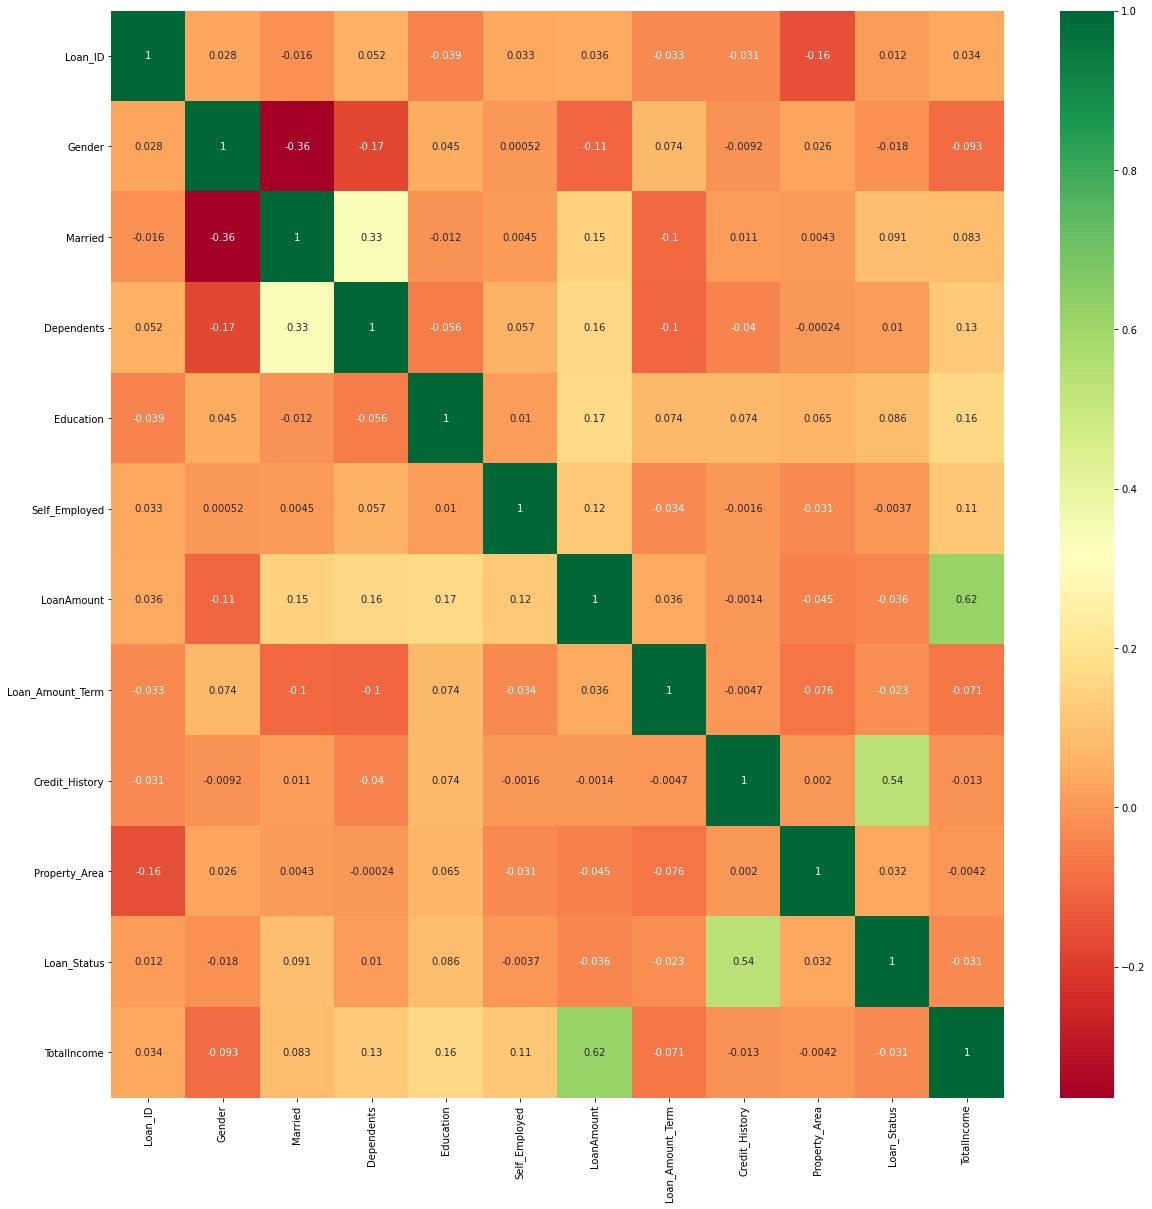

In [67]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [74]:
df.corr()['Loan_Status']

Loan_ID             0.011773
Gender             -0.017987
Married             0.091478
Dependents          0.010118
Education           0.085884
Self_Employed      -0.003700
LoanAmount         -0.036416
Loan_Amount_Term   -0.022549
Credit_History      0.540556
Property_Area       0.032112
Loan_Status         1.000000
TotalIncome        -0.031271
Name: Loan_Status, dtype: float64

In [76]:
df.drop(columns=['Loan_ID','Dependents','Self_Employed'], inplace=True)

In [77]:
df

,Gender,Married,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,0,1,146.412162,360.0,1.0,2,1,5849.0
1,0,1,1,128.000000,360.0,1.0,0,0,6091.0
2,0,1,1,66.000000,360.0,1.0,2,1,3000.0
3,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,0,0,1,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...
609,1,0,1,71.000000,360.0,1.0,0,1,2900.0
610,0,1,1,40.000000,180.0,1.0,0,1,4106.0
611,0,1,1,253.000000,360.0,1.0,2,1,8312.0
612,0,1,1,187.000000,360.0,1.0,2,1,7583.0


# Data Transformation

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df2 = pd.DataFrame(scaler.transform(df))

In [79]:
df2

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.198860,0.743590,1.0,1.0,1.0,0.055394
1,0.0,1.0,1.0,0.172214,0.743590,1.0,0.0,0.0,0.058435
2,0.0,1.0,1.0,0.082489,0.743590,1.0,1.0,1.0,0.019583
3,0.0,1.0,0.0,0.160637,0.743590,1.0,1.0,1.0,0.043980
4,0.0,0.0,1.0,0.191027,0.743590,1.0,1.0,1.0,0.057292
...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1.0,0.089725,0.743590,1.0,0.0,1.0,0.018326
610,0.0,1.0,1.0,0.044863,0.358974,1.0,0.0,1.0,0.033485
611,0.0,1.0,1.0,0.353111,0.743590,1.0,1.0,1.0,0.086352
612,0.0,1.0,1.0,0.257598,0.743590,1.0,1.0,1.0,0.077189


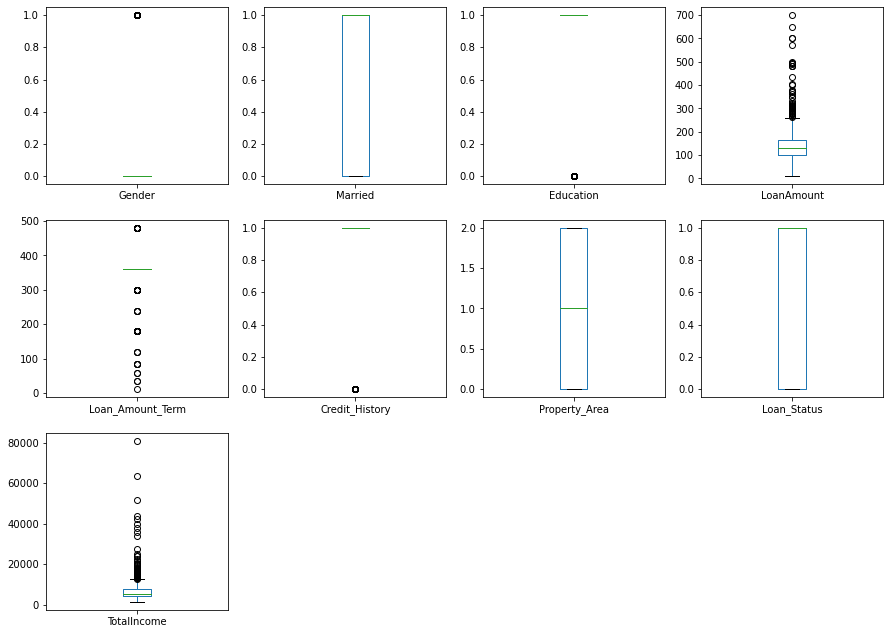

In [80]:
df.plot(kind = "box",layout = (4,4),subplots = True,figsize = (15,15))
plt.show()

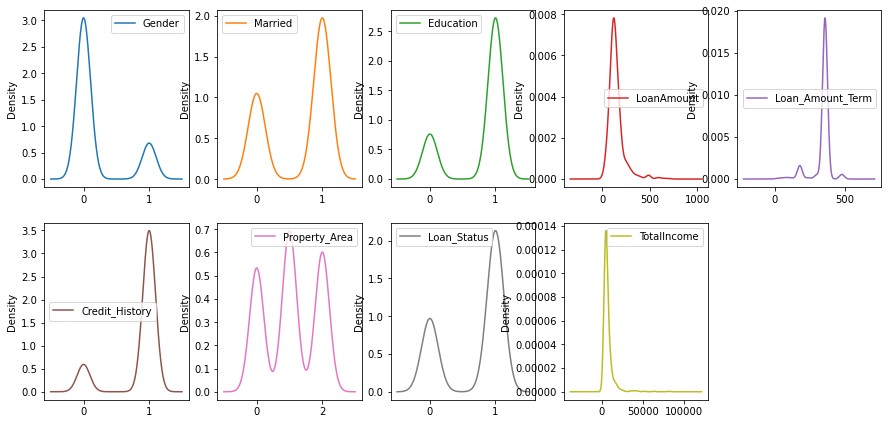

In [81]:
df.plot(kind = "density",layout = (4,5),subplots = True,figsize = (15,15),sharex = False)
plt.show()